In [32]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import bartlett
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')



postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

print(houseprices.columns)
pd.set_option('display.max_columns', None)
houseprices.head(10)


Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA

In [33]:
houseprices["lotfrontage"].fillna(houseprices["lotfrontage"].mean(), inplace=True)

houseprices["paved_street"] = pd.get_dummies(houseprices.street, drop_first=True)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["neighborhood"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["bldgtype"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["housestyle"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["centralair"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["kitchenqual"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["functional"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["garagetype"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["paveddrive"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["poolqc"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["fence"])], axis=1)
houseprices = pd.concat([houseprices, pd.get_dummies(houseprices["salecondition"])], axis=1)

dummies = houseprices.iloc[:, 80:]
pd.set_option('display.max_columns', None)

kitchen_qual = pd.concat([houseprices, pd.get_dummies(houseprices["kitchenqual"])], axis=1)
heatingqc = pd.concat([houseprices, pd.get_dummies(houseprices["heatingqc"])], axis=1)
dummies.corr()

,saleprice,paved_street,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,N,Y,Ex,Fa,Gd,TA,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,N,P,Y,Ex,Fa,Gd,GdPrv,GdWo,MnPrv,MnWw,Abnorml,AdjLand,Alloca,Family,Normal,Partial
saleprice,1.000000,0.041036,0.019066,-0.020250,-0.101303,-0.143648,0.055718,0.072626,0.071160,-0.179949,0.035940,-0.164056,-0.112544,-0.057845,-0.188513,-0.037910,0.023483,0.330424,0.402149,-0.192189,-0.063705,-0.128394,0.014560,0.140058,0.215363,0.126236,0.063471,0.137483,-0.097348,-0.114655,-0.098730,0.003804,-0.163466,-0.087686,-0.061811,0.036526,-0.025856,0.242880,-0.093090,-0.038645,-0.251328,0.251328,0.504094,-0.157199,0.321641,-0.519298,-0.033420,-0.070214,-0.064051,-0.071320,-0.016073,-0.017116,0.116462,-0.023974,0.335961,-0.029425,0.235449,-0.070371,-0.354141,-0.212630,-0.088623,0.231968,0.144146,0.016127,0.012038,-0.005152,-0.100047,-0.140613,-0.051164,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
paved_street,0.041036,1.000000,0.006972,0.002379,0.006762,0.013066,0.008983,0.021737,0.012221,-0.024967,0.015364,-0.194010,0.006972,0.011971,0.027419,0.005059,0.014737,0.010919,0.015158,0.018606,0.008479,0.014843,0.013183,0.016071,0.008479,-0.123987,0.005597,0.058171,-0.064806,-0.103192,0.011190,0.018695,-0.012796,0.006321,-0.021765,0.004768,0.005597,0.042534,-0.057764,0.013866,-0.069869,0.069869,0.017419,-0.055758,0.052600,-0.042386,0.006321,0.003766,0.009461,0.009919,0.006545,0.001682,-0.017419,-0.163228,0.056188,-0.087092,0.016269,-0.131726,0.014322,-0.028051,0.009304,0.019757,0.002379,0.002379,0.002915,0.013183,0.012589,0.022298,0.005597,0.017512,0.003367,-0.112734,0.007571,-0.002140,0.019657
Blmngtn,0.019066,0.006972,1.000000,-0.004020,-0.011425,-0.022077,-0.015177,-0.036728,-0.020650,-0.029432,-0.025960,-0.017502,-0.011781,-0.020227,-0.046329,-0.008548,-0.024901,-0.018450,-0.025611,-0.031437,-0.014326,-0.025080,-0.022274,-0.027155,-0.014326,-0.017743,-0.009457,-0.227491,-0.015987,-0.020859,-0.018908,0.349162,-0.037272,-0.010680,0.109137,-0.008057,-0.009457,-0.071868,-0.017502,-0.023429,-0.028634,0.028634,-0.004155,-0.017982,0.119530,-0.109286,-0.010680,-0.006363,-0.015987,-0.016760,-0.011059,-0.002842,0.029432,-0.006972,0.089384,-0.012463,-0.027489,-0.008548,-0.065185,-0.027820,-0.015721,0.032481,-0.004020,-0.004020,-0.004925,-0.022274,-0.021271,-0.037676,-0.009457,-0.029590,-0.005689,-0.009881,-0.012792,-0.032434,0.080883
Blueste,-0.020250,0.002379,-0.004020,1.000000,-0.003899,-0.007533,-0.005179,-0.012533,-0.007046,-0.010043,-0.008858,-0.005972,-0.004020,-0.006902,-0.015809,-0.002917,-0.008497,-0.006296,-0.008739,-0.010727,-0.004889,-0.008558,-0.007601,-0.009266,-0.004889,-0.006054,-0.003227,-0.083505,-0.005455,-0.007118,0.103080,0.058243,-0.012718,-0.003644,-0.036835,-0.002749,-0.003227,0.055936,-0.005972,-0.007995,-0.009771,0.009771,-0.010043,-0.006136,-0.030327,0.036784,-0.003644,-0.002171,-0.005455,-0.005719,-0.003774,-0.000970,0.010043,-0.002379,0.030500,-0.004253,-0.009380,-0.002917,-0.022243,-0.009493,-0.005364,0.011083,-0.001372,-0.001372,-0.001681,0.180480,-0.007258,-0.012856,-0.003227,-0.010097,-0.001941,-0.003372,-0.004365,0.017320,-0.011333
BrDale,-0.101303,0.006762,-0.011425,-0.003899,1.000000,-0.021410,-0.014719,-0.035619,-0.020027,-0.028543,-0.025176,-0.016974,-0.011425,-0.019616,-0.044930,-0.008290,-0.024149,-0.017893,-0.024838,-0.030488,-0.013894,-0.024323,-0.021601,-0.026335,-0.013894,-0.017208,-0.009171,-0.237329,-0.015504,-0.020229,0.448614,0.067449,-0.036146,-0.010358,-0.104688,-0.007813,-0.009171,0.158975,-0.016974,-0.022722,-0.027770,0.027770,-0.028543,-0.017439,-0.072771,0.091386,-0.010358,-0.006171,0.075769,-0.016254,-0.010725,-0.002756,-0.023548,-0.006762,-0.101010,-0.012087,-0.026659,-0.008290,0.130558,0.00037

In [34]:
features = houseprices[['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'garagecars', 'garagearea', 'TA']]
target = houseprices[['saleprice']]
lrm = linear_model.LinearRegression()

lrm.fit(features, target)
np.set_printoptions(suppress=True)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [[ 21546.40301002     23.97600525     11.87818604     42.77378189
   13630.6876023      15.23634803 -14138.50317818]]

Intercept: 
 [-78657.97318539]


In [36]:
features = sm.add_constant(features)

results = sm.OLS(target, features).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     684.2
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:37:54   Log-Likelihood:                -17480.
No. Observations:                1460   AIC:                         3.498e+04
Df Residuals:                    1452   BIC:                         3.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.866e+04   6363.496    -12.361      0.000   -9.11e+04   -6.62e+04
overallqual  2.155e+04   1151.028     18.719      0.000    1.93e+04    2.38e+04
totalbsmtsf    23.9760      4.270      5.615      0.000      15.600      32.352
firstflrsf     11.8782      4.978      2.386      0.017       2.114      21.642
grlivarea      42.7738      2.650     16.140      0.000      37.575      47.972
garagecars   1.363e+04   2988.871      4.560      0.000    7767.721    1.95e+04
garagearea     15.2363     10.359      1.471      0.142      -5.083      35.556
TA          -1.414e+04   2428.049     -5.823      0.000   -1.89e+04   -9375.645
==============================================================================
Omnibus:                      424.726   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41764.504
Skew:                          -0.216   Prob(JB):                         0.00
Kurtosis:                      29.198   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linearity of the Model in its Coefficients

I'm guessing my model looks like this:    

$$ y = -78657.97318539 + (21546.40301002)x_1 + (23.97600525)x_2 + (11.87818604)x_3 + (42.77378189)x_4 + (13630.6876023)x_5 + (15.23634803)x_6 + (-14138.50317818)x_7 + \epsilon$$


so again, I believe I have a linear function of the model's coefficients. Feedback would be greatly appreciated!!


Coefficients: 
 [-27.6936108]

Intercept: 
 37.92643818527722


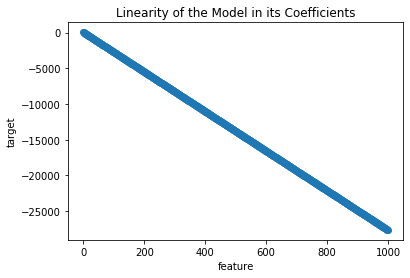

In [37]:
df = pd.DataFrame()

# data from 0 to 999
df["X"] = np.arange(0,1000,1)
# # we take the square of X
# df["X_sq"] = df["X"]**2
# df["X_cub"] = df["X"]**3
# df["X_qu"] = df["X"]**4

# this is our equation: Y = 1 + 2*X + 3*X^2
df["Y"] = 37.9264381852852 + (-32.49624543)*df["X"] + (-0.20141374)*df["X"] + (0.00404837)*df["X"] + 5*df["X"]

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X"]],df["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(df[["X"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linearity of the Model in its Coefficients')
plt.show()

## The Error Term Should be Zero on Average

The mean of the errors is very close to zero, but it is not zero. I've added a constant to the model, so this is an assumption that would need to be reviewed on the model.

In [43]:
predictions = lrm.predict(features)
errors = target - predictions
np.set_printoptions(suppress=True)

print("Mean of the errors in the houseprices model is: {}".format(np.mean(errors)))

print(predictions.shape)

Mean of the errors in the houseprices model is: saleprice    2.551569e-11
dtype: float64
(1460, 1)


## Homoscedasticity

The p-values of both tests are zero, so we the errors are heteoscedastic.

In [44]:
predictions = lrm.predict(features).ravel()
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

ValueError: Samples must be one-dimensional.